# Importing libraries

In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()


import warnings
warnings.filterwarnings('ignore') 

**dataset downloaded from:** https://www.kaggle.com/datasets/fatihilhan/imdb-top-250-movies/

# Loading data

In [2]:
df = pd.read_csv('Movies.csv')
df

,Movie,Released_year,Rating,Director
0,The Shawshank Redemption,1994,9.3,Frank Darabont
1,The Godfather,1972,9.2,Francis Ford Coppola
2,The Godfather: Part II,1974,9.0,Francis Ford Coppola
3,The Dark Knight,2008,9.0,Christopher Nolan
4,12 Angry Men,1957,8.9,Sidney Lumet
...,...,...,...,...
245,The Invisible Guest,2017,8.1,Oriol Paulo
246,Neon Genesis Evangelion: The End of Evangelion,1997,8.1,Kazuya Tsurumaki
247,The Battle of Algiers,1966,8.1,Gillo Pontecorvo
248,Tangerines,2013,8.2,Zaza Urushadze


# Preprocessing

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Movie          250 non-null    object
 1   Released_year  250 non-null    int64 
 2   Rating         250 non-null    object
 3   Director       250 non-null    object
dtypes: int64(1), object(3)
memory usage: 7.9+ KB


In [7]:
df.isnull().sum()

Movie            0
Released_year    0
Rating           0
Director         0
dtype: int64

**There are no null values.**

In [6]:
df['Rating'].unique()

array(['9.3', '9.2', '9.0', '8.9', '8.8', '8.7', '8.6', '8.5',
       'Bong Joon-ho', '8.4', 'Thomas Kail', 'Todd Phillips',
       'Nadine Labaki', '8.3', '8.2', 'Sam Mendes', '8.1',
       'Sergio Pablos', 'Sriram Raghavan', 'James Mangold'], dtype=object)

**We see that the rating columns have director names**

In [17]:
df[(df['Rating'] == 'Sriram Raghavan') | (df['Rating'] == 'Bong Joon-ho') | (df['Rating'] == 'Thomas Kail')
  | (df['Rating'] == 'Todd Phillips') | (df['Rating'] == 'Nadine Labaki') | (df['Rating'] == 'Sam Mendes')
  | (df['Rating'] == 'Sergio Pablos') | (df['Rating'] == 'Sriram Raghavan') | (df['Rating'] == 'James Mangold') ]

,Movie,Released_year,Rating,Director
29,Parasite,2019,Bong Joon-ho,Bong Joon-ho
58,Hamilton,2020,Thomas Kail,Thomas Kail
60,Joker,2019,Todd Phillips,Todd Phillips
76,Capernaum,2018,Nadine Labaki,Nadine Labaki
107,1917,2019,Sam Mendes,Sam Mendes
164,Klaus,2019,Sergio Pablos,Sergio Pablos
192,Andhadhun,2018,Sriram Raghavan,Sriram Raghavan
199,Ford v Ferrari,2019,James Mangold,James Mangold


**I will replace these values by their ratings. For this I will have to check the movie ratings individually from the IMDB website**

In [18]:
df['Rating'].replace({'Bong Joon-ho': 8.5, 'Thomas Kail': 8.3, 'Todd Phillips': 8.4, 'Nadine Labaki': 8.4, 
                     'Sam Mendes': 8.2, 'Sergio Pablos': 8.2, 'Sriram Raghavan': 8.2, 'James Mangold': 8.1}, inplace = True)
df['Rating'].unique()

array(['9.3', '9.2', '9.0', '8.9', '8.8', '8.7', '8.6', '8.5', 8.5, '8.4',
       8.3, 8.4, '8.3', '8.2', 8.2, '8.1', 8.1], dtype=object)

In [24]:
df[(df['Director'] == 'Sriram Raghavan') | (df['Director'] == 'Bong Joon-ho') | (df['Director'] == 'Thomas Kail')
  | (df['Director'] == 'Todd Phillips') | (df['Director'] == 'Nadine Labaki') | (df['Director'] == 'Sam Mendes')
  | (df['Director'] == 'Sergio Pablos') | (df['Director'] == 'Sriram Raghavan') | (df['Director'] == 'James Mangold') ]

,Movie,Released_year,Rating,Director
29,Parasite,2019,8.5,Bong Joon-ho
58,Hamilton,2020,8.3,Thomas Kail
60,Joker,2019,8.4,Todd Phillips
76,Capernaum,2018,8.4,Nadine Labaki
77,American Beauty,1999,8.4,Sam Mendes
107,1917,2019,8.2,Sam Mendes
164,Klaus,2019,8.2,Sergio Pablos
172,Memories of Murder,2003,8.1,Bong Joon-ho
192,Andhadhun,2018,8.2,Sriram Raghavan
199,Ford v Ferrari,2019,8.1,James Mangold


**Converting into float**

In [19]:
df['Rating'] = df['Rating'].apply(lambda x: float(x))
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Movie          250 non-null    object 
 1   Released_year  250 non-null    int64  
 2   Rating         250 non-null    float64
 3   Director       250 non-null    object 
dtypes: float64(1), int64(1), object(2)
memory usage: 7.9+ KB


# EDA

Text(0, 0.5, 'Count')

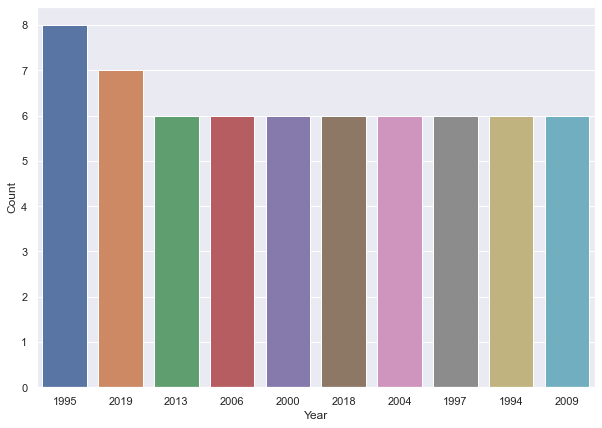

In [54]:
year = df['Released_year'].value_counts().sort_values(ascending = False)[:10].index
count = df['Released_year'].value_counts().sort_values(ascending = False)[:10].values
plt.figure(figsize = (10, 7))
sns.barplot(year, count, order = year)
plt.xlabel('Year')
plt.ylabel('Count')

In [66]:
def getMoviesPerYear(year):
    return df[df['Released_year'] == year]

In [67]:
y1 = getMoviesPerYear(1995)
y2 = getMoviesPerYear(2019)
my = pd.concat([y1, y2], axis = 0)
my.sort_values(by = 'Rating', ascending = False)

,Movie,Released_year,Rating,Director
19,Se7en,1995,8.6,David Fincher
32,The Usual Suspects,1995,8.6,Bryan Singer
29,Parasite,2019,8.5,Bong Joon-ho
78,Braveheart,1995,8.4,Mel Gibson
60,Joker,2019,8.4,Todd Phillips
75,Avengers: Endgame,2019,8.4,Joe Russo
81,Toy Story,1995,8.3,John Lasseter
122,Heat,1995,8.2,Michael Mann
137,Casino,1995,8.2,Martin Scorsese
107,1917,2019,8.2,Sam Mendes


**8 movies released in 1995 & 7 movies released in 2019 made it to the IMDB Top 250 list!**

<AxesSubplot:xlabel='Rating', ylabel='count'>

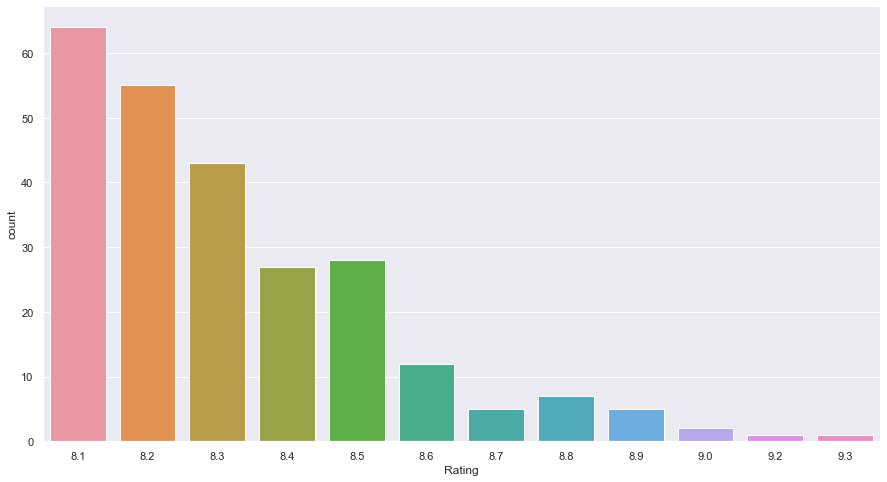

In [22]:
plt.figure(figsize = (15, 8))
sns.countplot(x = 'Rating', data = df)

**As we can see that most of the movies have ratings between 8.1 to 8.5.**

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Martin Scorsese'),
  Text(1, 0, 'Stanley Kubrick'),
  Text(2, 0, 'Christopher Nolan'),
  Text(3, 0, 'Akira Kurosawa'),
  Text(4, 0, 'Steven Spielberg'),
  Text(5, 0, 'Alfred Hitchcock'),
  Text(6, 0, 'Hayao Miyazaki'),
  Text(7, 0, 'Charlie Chaplin'),
  Text(8, 0, 'Quentin Tarantino'),
  Text(9, 0, 'Billy Wilder')])

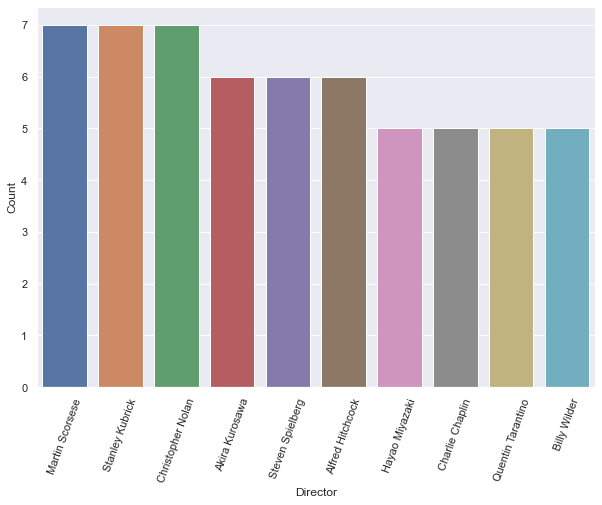

In [55]:
director = df['Director'].value_counts().sort_values(ascending = False)[:10].index
count = df['Director'].value_counts().sort_values(ascending = False)[:10].values
plt.figure(figsize = (10, 7))
sns.barplot(director, count, order = director)
plt.xlabel('Director')
plt.ylabel('Count')
plt.xticks(rotation = 70)

In [56]:
def getMoviesPerDirector(director):
    return df[df['Director'] == director]

In [65]:
ms = getMoviesPerDirector('Martin Scorsese')
sk = getMoviesPerDirector('Stanley Kubrick')
cn = getMoviesPerDirector('Christopher Nolan')
md = pd.concat([ms, sk, cn], axis = 0)
md.sort_values(by = 'Rating', ascending = False)

,Movie,Released_year,Rating,Director
3,The Dark Knight,2008,9.0,Christopher Nolan
12,Inception,2010,8.8,Christopher Nolan
16,GoodFellas,1990,8.7,Martin Scorsese
28,Interstellar,2014,8.6,Christopher Nolan
53,Memento,2000,8.5,Christopher Nolan
46,The Prestige,2006,8.5,Christopher Nolan
41,The Departed,2006,8.5,Martin Scorsese
70,The Dark Knight Rises,2012,8.4,Christopher Nolan
59,Paths of Glory,1957,8.4,Stanley Kubrick
62,The Shining,1980,8.4,Stanley Kubrick


**Martin Scorsese, Stanley Kubrick & Christopher Nolan have most movies in the IMDB Top 250.**

In [52]:
dr = df.groupby('Director')['Rating'].mean().sort_values(ascending = False)
dr = pd.DataFrame(dr)
dr

,Rating
Director,
Frank Darabont,8.9
Francis Ford Coppola,8.9
Jeethu Joseph,8.8
Hrishikesh Mukherjee,8.8
Irvin Kershner,8.8
...,...
Damián Szifron,8.1
John G. Avildsen,8.1
John Carpenter,8.1


**Frank Darabont & Francis Ford Coppola are tied for the highest average rating**

In [63]:
fd = getMoviesPerDirector('Frank Darabont')
ffc = getMoviesPerDirector('Francis Ford Coppola')
md = pd.concat([fd, ffc], axis = 0)
md.sort_values(by = 'Rating', ascending = False)

,Movie,Released_year,Rating,Director
0,The Shawshank Redemption,1994,9.3,Frank Darabont
1,The Godfather,1972,9.2,Francis Ford Coppola
2,The Godfather: Part II,1974,9.0,Francis Ford Coppola
26,The Green Mile,1999,8.5,Frank Darabont
52,Apocalypse Now,1979,8.5,Francis Ford Coppola
